In [1]:
import pandas as pd
from variants_compare import VariantsCompare
from pm4py.objects.conversion.log import converter as log_converter

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
df = pd.read_csv('data/event_meta_table-gls.csv',sep=';')

In [3]:
df.head()

,case:concept:name,concept:name,concept:flops,concept:kernel,concept:operation,timestamp:start
0,algorithm36,transpose_1,1.0,"transpose!(ml3, ml0)",tmp56 = X^T,2022-12-21 19:45:06.090288
1,algorithm36,LAPACK.potrf_3.33e+08,333000000.0,"LAPACK.potrf!('L', ml1)",(L2 L2^T) = M,2022-12-21 19:45:07.090288
2,algorithm36,trsm_2.3e+08,230000000.0,"trsm!('L', 'L', 'N', 'N', 1.0, ml1, ml0)",tmp12 = (L2^-1 X),2022-12-21 19:45:08.090288
3,algorithm36,trsv_1e+06,1000000.0,"trsv!('L', 'N', 'N', ml1, ml2)",tmp68 = (L2^-1 y),2022-12-21 19:45:09.090288
4,algorithm36,syrk_5.29e+07,52900000.0,"syrk!('L', 'T', 1.0, ml0, 0.0, ml4)",tmp14 = (tmp12^T tmp12),2022-12-21 19:45:10.090288


In [18]:
def clean_concept(name):
    splits = name.split('=')
    if len(splits) > 1:
        return splits[-1].strip()
    return splits[0].strip()

df['concept:name'] = df['concept:name'].apply(lambda row: clean_concept(row))

In [28]:
df

,case:concept:name,concept:name,concept:flops,concept:kernel,concept:operation,timestamp:start
0,algorithm36,transpose_1,1.0,"transpose!(ml3, ml0)",tmp56 = X^T,2022-12-21 19:45:06.090288
1,algorithm36,LAPACK.potrf_3.33e+08,333000000.0,"LAPACK.potrf!('L', ml1)",(L2 L2^T) = M,2022-12-21 19:45:07.090288
2,algorithm36,trsm_2.3e+08,230000000.0,"trsm!('L', 'L', 'N', 'N', 1.0, ml1, ml0)",tmp12 = (L2^-1 X),2022-12-21 19:45:08.090288
3,algorithm36,trsv_1e+06,1000000.0,"trsv!('L', 'N', 'N', ml1, ml2)",tmp68 = (L2^-1 y),2022-12-21 19:45:09.090288
4,algorithm36,syrk_5.29e+07,52900000.0,"syrk!('L', 'T', 1.0, ml0, 0.0, ml4)",tmp14 = (tmp12^T tmp12),2022-12-21 19:45:10.090288
...,...,...,...,...,...,...
919,algorithm44,trsv_1e+06,1000000.0,"trsv!('L', 'T', 'N', ml1, ml2)",tmp71 = (L2^-T tmp68),2022-12-21 19:58:31.090288
920,algorithm44,qr_3.24e+07,32400000.0,ml4 = qr!(ml4),(Q16 R17) = tmp14,2022-12-21 19:58:32.090288
921,algorithm44,gemv_4.6e+05,460000.0,"gemv!('N', 1.0, ml3, ml2, 0.0, ml5)",tmp21 = (tmp56 tmp71),2022-12-21 19:58:33.090288
922,algorithm44,gemv_1.06e+05,106000.0,"gemv!('T', 1.0, ml6, ml5, 0.0, ml7)",tmp25 = (Q16^T tmp21),2022-12-21 19:58:34.090288


In [20]:
xes_log = log_converter.apply(df)

In [21]:
for t in xes_log:
    for e in t:
        print(e['concept:name'],'(or)', e['concept:operation'])
    break

transpose_1 (or) tmp56 = X^T
LAPACK.potrf_3.33e+08 (or) (L2 L2^T) = M
trsm_2.3e+08 (or) tmp12 = (L2^-1 X)
trsv_1e+06 (or) tmp68 = (L2^-1 y)
syrk_5.29e+07 (or) tmp14 = (tmp12^T tmp12)
qr_3.24e+07 (or) (Q16 R17) = tmp14
trsv_1e+06 (or) tmp71 = (L2^-T tmp68)
gemv_4.6e+05 (or) tmp21 = (tmp56 tmp71)
gemv_1.06e+05 (or) tmp25 = (Q16^T tmp21)
trsv_5.29e+04 (or) tmp24 = (R17^-1 tmp25)


In [32]:
all_vars = list(df['case:concept:name'].unique())
best = ['algorithm0', 'algorithm1']
worst = ['algorithm3', 'algorithm4']
#worst = all_vars.copy()
#for v in best:
#    worst.remove(v)

activity_key = 'concept:name'
#activity_key = 'concept:operation'

In [33]:
vc = VariantsCompare(xes_log,best,worst,activity_key=activity_key)

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


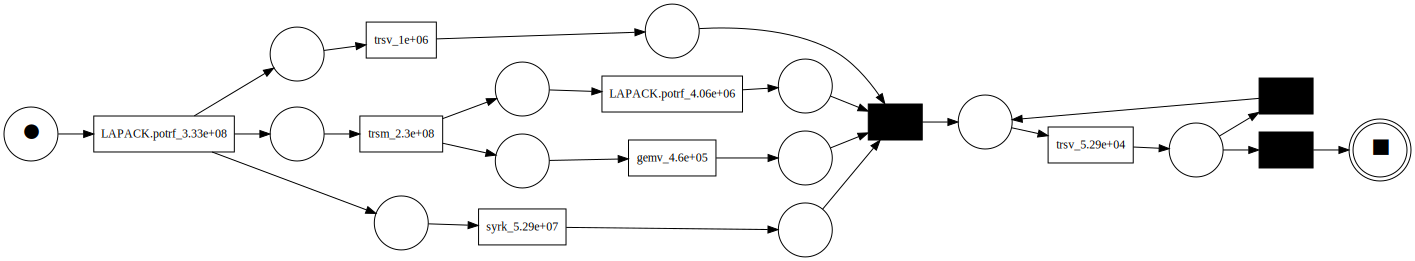

In [34]:
vc.show_petrinet(best,activity_key=activity_key)

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


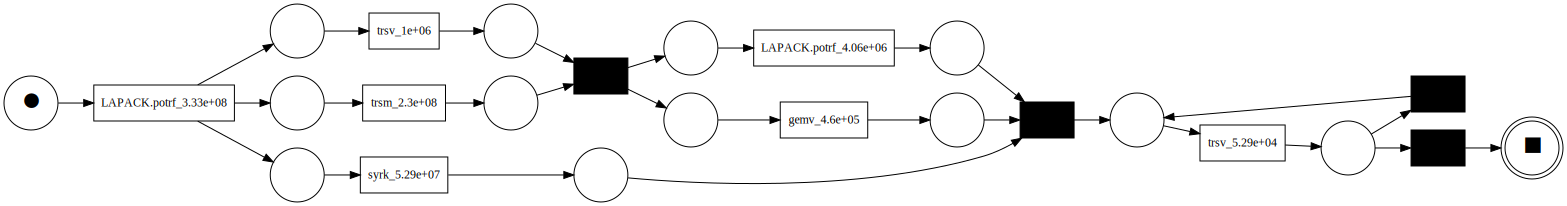

In [35]:
vc.show_petrinet(worst,activity_key=activity_key)

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


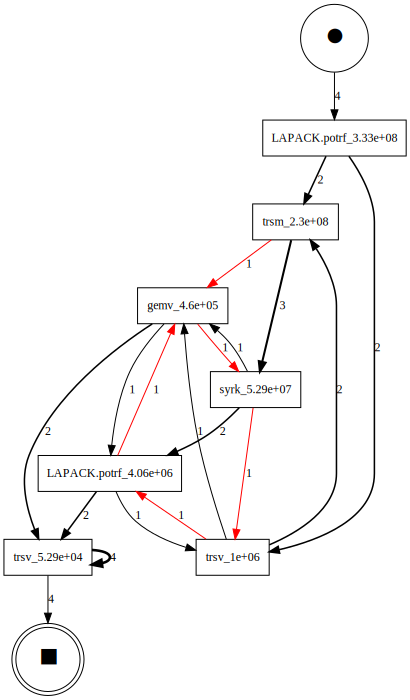

In [36]:
gviz = vc.get_dfg_minus_best()
gviz

In [37]:
gviz.render(filename='output/gls', format='pdf')

'output/gls.pdf'

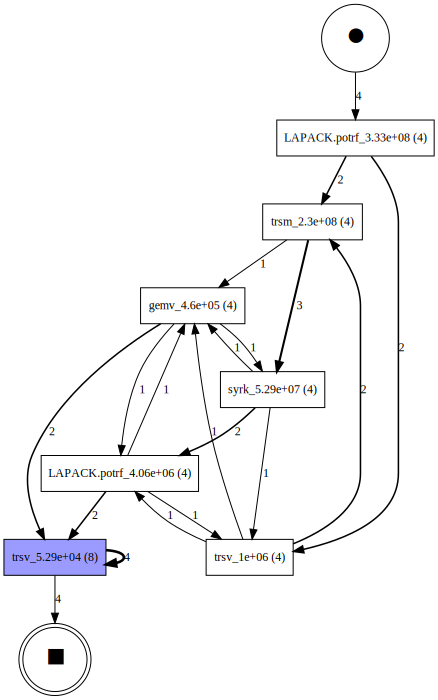

In [38]:
gviz = vc.dfg_compare.get_dfg()
gviz

In [31]:
gviz.render(filename='output/gls-full', format='pdf')

'output/gls-full.pdf'